# Fitting a sine wave

In [2]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 69.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00:00:01


In [6]:
import pennylane as qml
from pennylane import numpy as pnp
dev= qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def quantum_circuit(datapoint,params):# A single Qubit Circuit
    qml.RX(datapoint,wires=0)
    qml.RY(params[0],wires=0)
    qml.RX(params[1],wires=0)
    qml.RZ(params[2],wires=0)
    return qml.expval(qml.PauliZ(0))
print(type(quantum_circuit))

<class 'pennylane.workflow.qnode.QNode'>


In [7]:
def loss(preds,targets):
    tl=0
    for i in range(len(preds)):
        tl+=(preds[i]-targets[i])**2
    return tl

In [8]:
def cost(params,X,Y):
    predictions=[quantum_circuit(x,params) for x in X]
    return loss(predictions,Y)

In [10]:

init_params = pnp.gradient([0.1, 0.1,0.1] ,requires_grad=True)

max_iter=250
opt=qml.GradientDescentOptimizer(stepsize=0.1)
def optimizer(max_iter,opt,cost,params,X,Y):
    for i in range(max_iter):
        [params,_,_],prev_cost=opt.step_and_cost(cost,params,X,Y)
    if(i+1)%10==0:
        print(f"Step={i+1},Cost={cost(params,X,Y):.6f}")
    print(cost(params,X,Y))
    print("Final parameters:",params)
    return params
X = pnp.linspace(0, 2*pnp.pi,15)# Fitting using 15 data points between 0 to 2*pi
Y = pnp.sin(X)
final_params= optimizer(max_iter,opt,cost,init_params,X,Y)



Step=250,Cost=0.000000
5.30292921444335e-31
Final parameters: [ 0.         -1.57079633  0.        ]


In [11]:
predictions = quantum_circuit(X,final_params)
# Measure the Mean Squared Error
mse = pnp.mean((predictions - Y) ** 2)
print(f"Mean Squared Error: {mse:.6f}")

Mean Squared Error: 0.000000


In [12]:
X_test = pnp.linspace(3*pnp.pi+0.1, 10*pnp.pi+0.1, 30)
Y_test = pnp.sin(X_test)

<generator object <genexpr> at 0x7bbe402ddf50>
Mean Squared Error: 0.000000


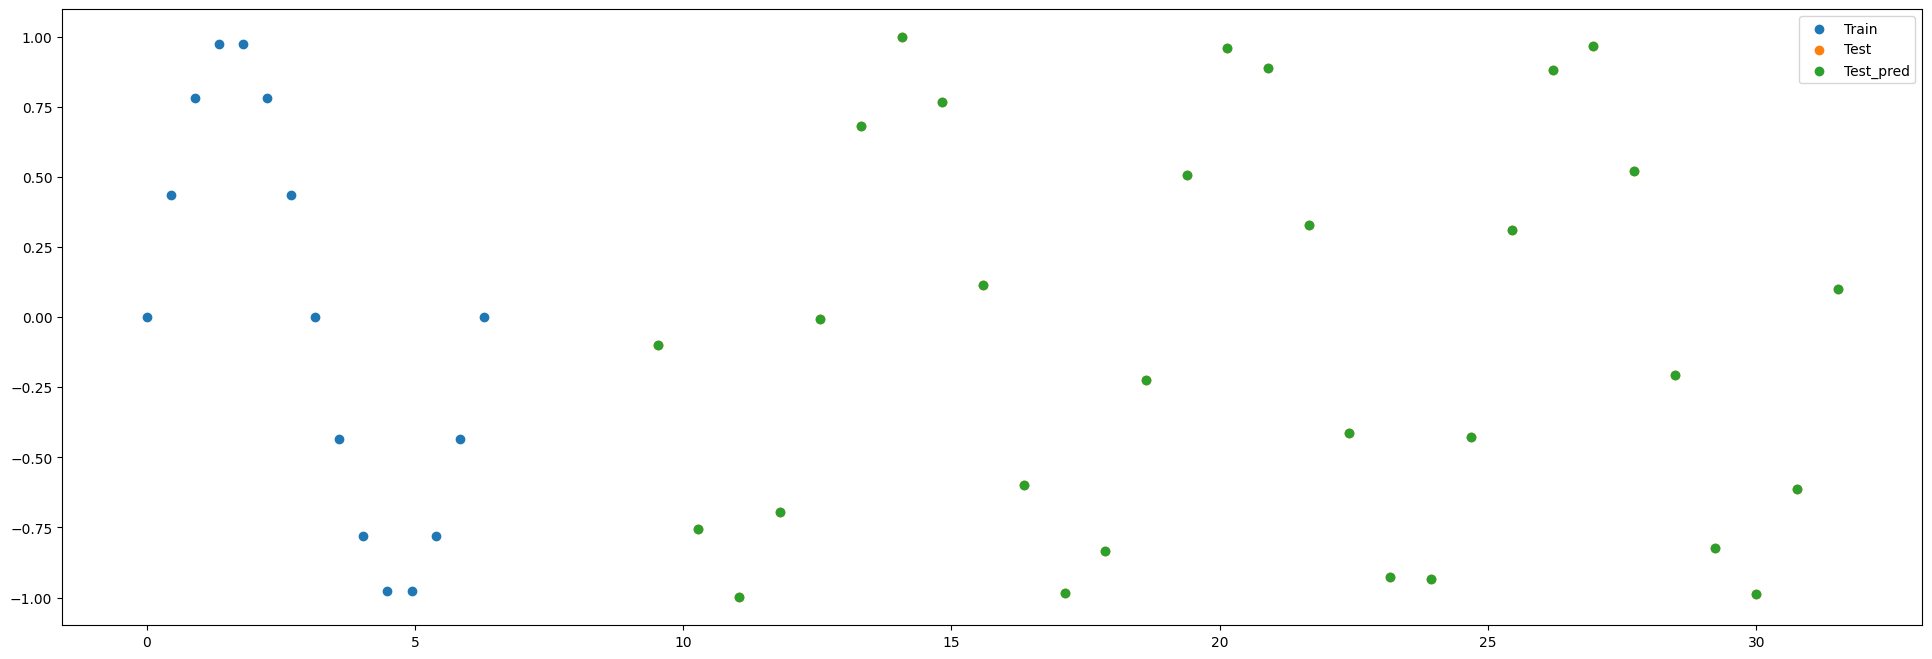

In [13]:
test_pred=[quantum_circuit(x,final_params) for x in X_test]
predictions = quantum_circuit(X_test,final_params)
print([predictions[i]-Y_test[i]] for i in range(30))

mse = pnp.mean((predictions - Y_test) ** 2)
print(f"Mean Squared Error: {mse:.6f}")
def plot(X,Y,X_test,Y_test,test_pred):
    fig=plt.figure(figsize=(24,8))
    ax1=fig.add_subplot(111)
    ax1.scatter(X,Y,label="Train")
    ax1.scatter(X_test,Y_test,label="Test")
    ax1.scatter(X_test,test_pred,label="Test_pred")
    ax1.legend()
    plt.show()
import matplotlib.pyplot as plt
plot(X,Y,X_test,Y_test,test_pred)


This worked exceptionally well, simulating the sine fucntion almost perfectly, even though the test dataset has some noise added to the it. 